# TMDB Data Analysis

The Movie Database API contains several endpoints to query information about shows and movies. Please read through the documentation and use the notes and hints provided below to help answer the following questions:

1. What was the most popular movie genre in December 2017? How did you define a metric for popularity, and why is it meaningful? What other metrics did you consider?

2. How does genre popularity vary by time of year?  Why do you think this is?
 

We’d like to see some form(s) of data visualization as part of your response, and left the second question intentionally open-ended to give you some flexibility in your approach. Feel free to use whatever tools you are most comfortable with for this kind of work.


# importing and cleaning data

In [555]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns

import requests
import json
from pandas.io.json import json_normalize

import time

pd.options.display.float_format = '{:,}'.format

In [443]:
dec_url = 'http://api.themoviedb.org/3/discover/movie?release_date.gte=2017-12-01&release_date.lte=2017-12-31&api_key=606aaffd7ca10f0b80804a1f0674e4e1&sort_by=revenue.desc'

#just looking at past 5 years, could go earlier but this is just to save time and run faster
url_one = 'http://api.themoviedb.org/3/discover/movie?&api_key=606aaffd7ca10f0b80804a1f0674e4e1&release_date.gte=2019-01-01'
url_two = 'http://api.themoviedb.org/3/discover/movie?&api_key=606aaffd7ca10f0b80804a1f0674e4e1&release_date.gte=2018-01-01&release_date.lte=2018-12-31'
url_three = 'http://api.themoviedb.org/3/discover/movie?&api_key=606aaffd7ca10f0b80804a1f0674e4e1&release_date.gte=2017-01-01&release_date.lte=2017-12-31'
url_four = 'http://api.themoviedb.org/3/discover/movie?&api_key=606aaffd7ca10f0b80804a1f0674e4e1&release_date.gte=2016-01-01&release_date.lte=2016-12-31'
url_five = 'http://api.themoviedb.org/3/discover/movie?&api_key=606aaffd7ca10f0b80804a1f0674e4e1&release_date.gte=2015-01-01&release_date.lte=2015-12-31'
url_six = 'http://api.themoviedb.org/3/discover/movie?&api_key=606aaffd7ca10f0b80804a1f0674e4e1&release_date.gte=2014-01-01&release_date.lte=2014-12-31'

In [389]:
# function to create empty dataframe with column names from results
def setCols():
    r = requests.get(dec_url).json()
    cols = pd.DataFrame(columns=r['results'][0].keys())
    return cols

### import December movies
### note: using release date, not primary release date. definition provided on website unclear but assuming this is any movie that was showing in December, rather than just opening in December

In [390]:
# find total number of pages to loop through for December movies
total_pages = requests.get(dec_url).json()['total_pages']
total_pages

85

In [391]:
# add another sleep here or adjust mod below to account for total page request above and api request limits
time.sleep(10)

dec = setCols()

# loop through each page and append results to dataframe
for page in range (1, total_pages + 1):
    
    if page % 40 == 0:
        time.sleep(10) ## API limited to 40 requests every 10 seconds
        
    response = requests.get(dec_url + '&page=' + str(page)).json()['results']
    response_df = pd.DataFrame(json_normalize(response))
    dec = dec.append(response_df)
                            
    page = page + 1

dec.reset_index(inplace = True)
dec.drop(columns=['index'], inplace=True)

dec.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count
0,False,/baNQpUlmX8shVmJBGHMSL5Y6MBl.jpg,"[14, 12, 878, 28]",181808,en,Star Wars: The Last Jedi,Rey develops her newly discovered abilities wi...,36.989,/kOVEVeg59E0wsnXmF9nrh6OmWII.jpg,2017-12-13,Star Wars: The Last Jedi,False,7.0,8374
1,False,/tZjVVIYXACV4IIIhXeIM59ytqwS.jpg,"[28, 12, 878]",330459,en,Rogue One: A Star Wars Story,A rogue band of resistance fighters unite for ...,18.65,/qjiskwlV1qQzRCjpV0cL9pEMF9a.jpg,2016-12-14,Rogue One: A Star Wars Story,False,7.5,9163
2,False,/ftRkFtAGuHngHnLiOxktq0aCVMF.jpg,"[28, 16, 35, 10751, 12]",324852,en,Despicable Me 3,Gru and his wife Lucy must stop former '80s ch...,12.443,/6t3YWl7hrr88lCEFlGVqW5yV99R.jpg,2017-06-15,Despicable Me 3,False,6.4,4041
3,False,/rz3TAyd5kmiJmozp3GUbYeB5Kep.jpg,"[28, 12, 35, 14]",353486,en,Jumanji: Welcome to the Jungle,The tables are turned as four teenagers are su...,20.743,/bXrZ5iHBEjH7WMidbUDQ0U2xbmr.jpg,2017-12-09,Jumanji: Welcome to the Jungle,False,6.7,7087
4,False,/s2bT29y0ngXxxu2IA8AOzzXTRhd.jpg,"[28, 878, 12]",27205,en,Inception,"Cobb, a skilled thief who commits corporate es...",35.951,/qmDpIHrmpJINaRKAfWQfftjCdyi.jpg,2010-07-15,Inception,False,8.3,21865


### import genre identifiers and clean up genre lists

In [392]:
time.sleep(10)

genres_json = requests.get('https://api.themoviedb.org/3/genre/movie/list?api_key=606aaffd7ca10f0b80804a1f0674e4e1').json()['genres']
genres = pd.DataFrame(json_normalize(genres_json))
genres.columns = ['genre_ids', 'genre']
genres.head()

,genre_ids,genre
0,28,Action
1,12,Adventure
2,16,Animation
3,35,Comedy
4,80,Crime


In [393]:
dec.genre_ids[0]

[14, 12, 878, 28]

In [394]:
# can't take credit for this-- found some helpful stuff on stack overflow!
# https://stackoverflow.com/questions/12680754/split-explode-pandas-dataframe-string-entry-to-separate-rows/40449726

# genre_ids originally in a list, but I want one row per genre ID where there are multiple
def explode_list(df, col):
    s = df[col]
    i = np.arange(len(s)).repeat(s.str.len())
    return df.iloc[i].assign(**{col: np.concatenate(s)})

In [395]:
dec1 = explode_list(dec,'genre_ids')

In [396]:
# add column with genre
dec2 = dec1.merge(right=genres, how='left', on='genre_ids')

### import movie revenues

In [397]:
time.sleep(10)

movie_ids = dec['id'].tolist()

columns = ['id', 'revenue']
rev = pd.DataFrame(columns = columns, dtype = float)

count = 0

# loop through each page and append results to dataframe
for movie_id in movie_ids:
    
    if count % 40 == 0:
        time.sleep(10) ## API limited to 40 requests every 10 seconds
        
    response = requests.get('https://api.themoviedb.org/3/movie/' + str(movie_id) + '?api_key=606aaffd7ca10f0b80804a1f0674e4e1' ).json()['revenue']
    response_df = pd.DataFrame({'id': [movie_id], 'revenue': [response]})
    rev = rev.append(response_df)
                            
    count = count + 1

rev.head()

,id,revenue
0,"181,808.0","1,332,459,537.0"
0,"330,459.0","1,056,057,273.0"
0,"324,852.0","1,031,552,585.0"
0,"353,486.0","962,119,864.0"
0,"27,205.0","825,532,764.0"


In [398]:
# add revenue column to main dataframe
dec3 = dec2.merge(right=rev, how='left', on='id')

In [417]:
dec3.sort_values('revenue', ascending=False).head()

,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count,genre,revenue
0,False,/baNQpUlmX8shVmJBGHMSL5Y6MBl.jpg,14.0,181808,en,Star Wars: The Last Jedi,Rey develops her newly discovered abilities wi...,36.989,/kOVEVeg59E0wsnXmF9nrh6OmWII.jpg,2017-12-13,Star Wars: The Last Jedi,False,7.0,8374,Fantasy,"1,332,459,537.0"
3,False,/baNQpUlmX8shVmJBGHMSL5Y6MBl.jpg,28.0,181808,en,Star Wars: The Last Jedi,Rey develops her newly discovered abilities wi...,36.989,/kOVEVeg59E0wsnXmF9nrh6OmWII.jpg,2017-12-13,Star Wars: The Last Jedi,False,7.0,8374,Action,"1,332,459,537.0"
1,False,/baNQpUlmX8shVmJBGHMSL5Y6MBl.jpg,12.0,181808,en,Star Wars: The Last Jedi,Rey develops her newly discovered abilities wi...,36.989,/kOVEVeg59E0wsnXmF9nrh6OmWII.jpg,2017-12-13,Star Wars: The Last Jedi,False,7.0,8374,Adventure,"1,332,459,537.0"
2,False,/baNQpUlmX8shVmJBGHMSL5Y6MBl.jpg,878.0,181808,en,Star Wars: The Last Jedi,Rey develops her newly discovered abilities wi...,36.989,/kOVEVeg59E0wsnXmF9nrh6OmWII.jpg,2017-12-13,Star Wars: The Last Jedi,False,7.0,8374,Science Fiction,"1,332,459,537.0"
6,False,/tZjVVIYXACV4IIIhXeIM59ytqwS.jpg,878.0,330459,en,Rogue One: A Star Wars Story,A rogue band of resistance fighters unite for ...,18.65,/qjiskwlV1qQzRCjpV0cL9pEMF9a.jpg,2016-12-14,Rogue One: A Star Wars Story,False,7.5,9163,Science Fiction,"1,056,057,273.0"


# What was the most popular movie genre in December 2017? How did you define a metric for popularity, and why is it meaningful? What other metrics did you consider?

### https://developers.themoviedb.org/3/getting-started/popularity

## popularity feature encompasses the following:
- Number of votes for the day
- Number of views for the day
- Number of users who marked it as a "favourite" for the day
- Number of users who added it to their "watchlist" for the day
- Release date
- Number of total votes
- Previous days score


## how is popularity defined?
- Users of TMDB are likely heavily interested in movies, more so than the average moviegoer. Perhaps they have opinions that skew closer to critical reception rather than audience reception?
- Is popularity based on this dataset alone and limited to this specific segment of people who use this database? 
    - If not, revenue seems like the best way to see beyond these users
- It's unclear if we should be using release date, or primary release date. Using just release date is much broader... so is the release date column related to the first release rather than wide release? I'm assuming here that using release date is including all movies that were playing in December, which seems the best way to gauge popularity for that one month.
- There's no indicator for how long the movie was playing in theaters, which would help for certain metrics being considered. For example, "It's a Wonderful Life" shows up as playing in December, but if we were looking at revenue, we'd want to be able to isolate just to December 2017 alone and not everything since 1946.


## other metrics considered
- number of movies by genre
- average/sum of vote_average
- average/sum of revenue



In [650]:
dec3.sort_values('popularity', ascending=False).head()

,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count,genre,revenue
290,False,/adFgBkl35kdI0bSrWZO2xury1JB.jpg,"9,648.0",339877,en,Loving Vincent,The film brings the paintings of Vincent van G...,42.489,/56sq57kDm7XgyXBYrgJLumo0Jac.jpg,2017-06-22,Loving Vincent,False,8.2,1180,Mystery,"6,735,118.0"
289,False,/adFgBkl35kdI0bSrWZO2xury1JB.jpg,18.0,339877,en,Loving Vincent,The film brings the paintings of Vincent van G...,42.489,/56sq57kDm7XgyXBYrgJLumo0Jac.jpg,2017-06-22,Loving Vincent,False,8.2,1180,Drama,"6,735,118.0"
288,False,/adFgBkl35kdI0bSrWZO2xury1JB.jpg,16.0,339877,en,Loving Vincent,The film brings the paintings of Vincent van G...,42.489,/56sq57kDm7XgyXBYrgJLumo0Jac.jpg,2017-06-22,Loving Vincent,False,8.2,1180,Animation,"6,735,118.0"
59,False,/8QXGNP0Vb4nsYKub59XpAhiUSQN.jpg,878.0,335984,en,Blade Runner 2049,Thirty years after the events of the first fil...,42.196,/gajva2L0rPYkEWjzgFlBXCAVBE5.jpg,2017-10-04,Blade Runner 2049,False,7.4,6563,Science Fiction,"259,239,658.0"
277,False,/nMomMy1sD3SN2QsKop3zBXCJfDJ.jpg,18.0,1585,en,It's a Wonderful Life,A holiday favourite for generations... George...,41.214,/rgj6QjdyCeDrO9KGt1kusGyhvb2.jpg,1946-12-20,It's a Wonderful Life,False,8.2,1988,Drama,"9,644,124.0"


### number of movies per genre (idea is that movies are released to cater to audience preferences)

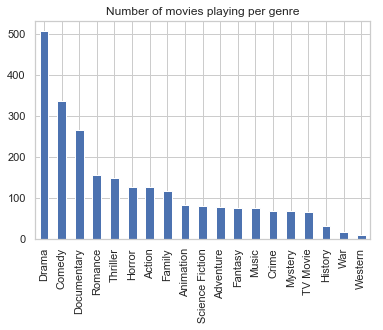

In [412]:
dec3['genre'].value_counts().plot.bar()
plt.title('Number of movies playing per genre')
plt.show()

### popularity score by genre
If we sum the popularity score, we account more for the number of movies within that category rather than how succesful each inidivual one was. If we take the average popularity score, can take into account that most movies in that genre are popular. <br><br>
Note here that there aren't a lot of war movies, BUT there were several very popular war movies in this time period- The Imitation Game, The 12th Man, Dunkirk. This isn't evident in any way just looking at the sum of popularity scores.

In [402]:
#dec3[['genre','popularity']].groupby('genre').sum()

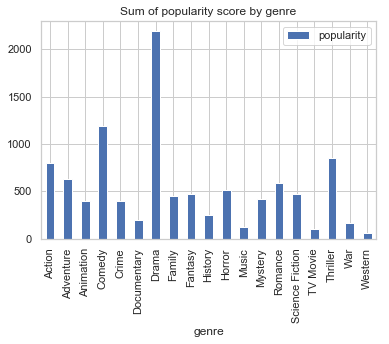

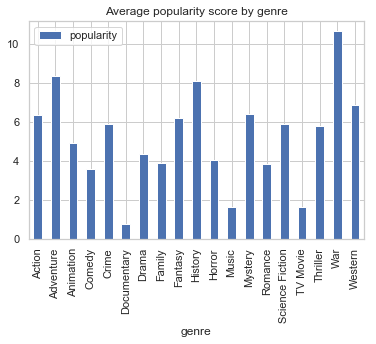

In [410]:
dec3[['genre','popularity']].groupby('genre').sum().plot.bar()
plt.title('Sum of popularity score by genre')
plt.show()

# average popularity score by genre
dec3[['genre','popularity']].groupby('genre').mean().plot.bar()
plt.title('Average popularity score by genre')
plt.show()

In [416]:
dec3[dec3.genre == 'War'].sort_values('popularity', ascending=False).head()['title']

73                 The Imitation Game
26                            Dunkirk
31     War for the Planet of the Apes
680                      The 12th Man
955       The Man with the Iron Heart
Name: title, dtype: object

### vote average by genre
These charts generally echo what is already encompassed in the popularity feature plots above. since popularity considers vote average (amongst other things), popularity seems more representative than vote average and I'm inclined to not use this

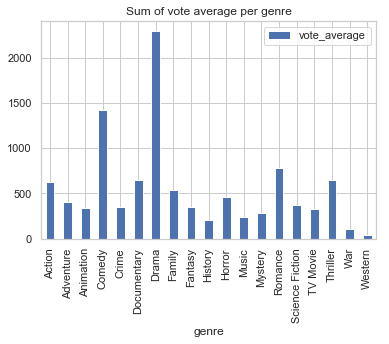

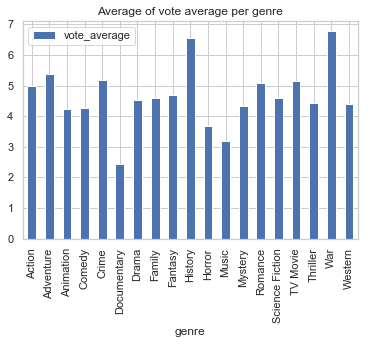

In [413]:
dec3[['genre','vote_average']].groupby('genre').sum().plot.bar()
plt.title('Sum of vote average per genre')
plt.show()

dec3[['genre','vote_average']].groupby('genre').mean().plot.bar()
plt.title('Average of vote average per genre')
plt.show()

### Revenue by genre
Summing revenue skews very heavily to Action/Adventure, primarily because of the two Star Wars movies, taking the average accounts for some of the popular war movies mentioned above.<br><br>
But again, what population do we want to consider? all movie-goers vs. users of TMDB? Likely will not want to use revenue after all and just consider TMDB users.

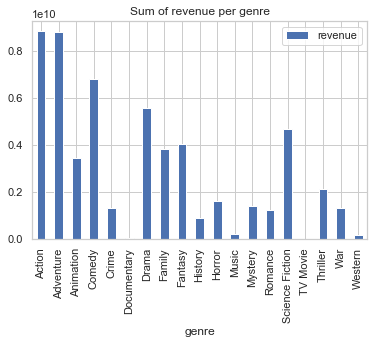

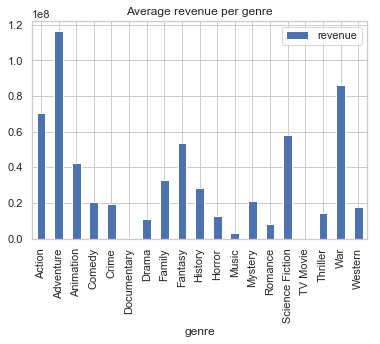

In [414]:
dec3[['genre','revenue']].groupby('genre').sum().plot.bar()
plt.title('Sum of revenue per genre')
plt.show()

dec3[['genre','revenue']].groupby('genre').mean().plot.bar()
plt.title('Average revenue per genre')
plt.show()


In [651]:
dec3.sort_values('revenue', ascending=False).head()

,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count,genre,revenue
0,False,/baNQpUlmX8shVmJBGHMSL5Y6MBl.jpg,14.0,181808,en,Star Wars: The Last Jedi,Rey develops her newly discovered abilities wi...,36.989,/kOVEVeg59E0wsnXmF9nrh6OmWII.jpg,2017-12-13,Star Wars: The Last Jedi,False,7.0,8374,Fantasy,"1,332,459,537.0"
3,False,/baNQpUlmX8shVmJBGHMSL5Y6MBl.jpg,28.0,181808,en,Star Wars: The Last Jedi,Rey develops her newly discovered abilities wi...,36.989,/kOVEVeg59E0wsnXmF9nrh6OmWII.jpg,2017-12-13,Star Wars: The Last Jedi,False,7.0,8374,Action,"1,332,459,537.0"
1,False,/baNQpUlmX8shVmJBGHMSL5Y6MBl.jpg,12.0,181808,en,Star Wars: The Last Jedi,Rey develops her newly discovered abilities wi...,36.989,/kOVEVeg59E0wsnXmF9nrh6OmWII.jpg,2017-12-13,Star Wars: The Last Jedi,False,7.0,8374,Adventure,"1,332,459,537.0"
2,False,/baNQpUlmX8shVmJBGHMSL5Y6MBl.jpg,878.0,181808,en,Star Wars: The Last Jedi,Rey develops her newly discovered abilities wi...,36.989,/kOVEVeg59E0wsnXmF9nrh6OmWII.jpg,2017-12-13,Star Wars: The Last Jedi,False,7.0,8374,Science Fiction,"1,332,459,537.0"
6,False,/tZjVVIYXACV4IIIhXeIM59ytqwS.jpg,878.0,330459,en,Rogue One: A Star Wars Story,A rogue band of resistance fighters unite for ...,18.65,/qjiskwlV1qQzRCjpV0cL9pEMF9a.jpg,2016-12-14,Rogue One: A Star Wars Story,False,7.5,9163,Science Fiction,"1,056,057,273.0"


## *** final decision: Assuming we only care about the TMDB user population, the best way to calculate popularity by genre is to take the average popularity score. We want to take into account how well liked the movies were overall in the category without being influenced by the number of movies (i.e. there could be hundreds of unpopular action movies, but just the number of them alone could have popularity scores that would add up to be higher than the most popular movie that was one of few in its genre). This would make war movies the most popular genre of December 2017.


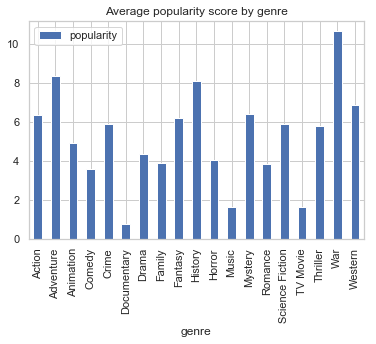

In [411]:
dec3[['genre','popularity']].groupby('genre').mean().plot.bar()
plt.title('Average popularity score by genre')
plt.show()

# How does genre popularity vary by time of year?
My general hypothesis is that we have action blockbusters in the summer, award season towards the end of the year, and not a lot of options any other time of year.

In [644]:
urls = [ 'http://api.themoviedb.org/3/discover/movie?&api_key=606aaffd7ca10f0b80804a1f0674e4e1&release_date.gte=2019-01-01',
        'http://api.themoviedb.org/3/discover/movie?&api_key=606aaffd7ca10f0b80804a1f0674e4e1&release_date.gte=2018-01-01&release_date.lte=2018-12-31',
        'http://api.themoviedb.org/3/discover/movie?&api_key=606aaffd7ca10f0b80804a1f0674e4e1&release_date.gte=2017-01-01&release_date.lte=2017-12-31',
        'http://api.themoviedb.org/3/discover/movie?&api_key=606aaffd7ca10f0b80804a1f0674e4e1&release_date.gte=2016-01-01&release_date.lte=2016-12-31' 
        ,'http://api.themoviedb.org/3/discover/movie?&api_key=606aaffd7ca10f0b80804a1f0674e4e1&release_date.gte=2015-01-01&release_date.lte=2015-12-31',
        'http://api.themoviedb.org/3/discover/movie?&api_key=606aaffd7ca10f0b80804a1f0674e4e1&release_date.gte=2014-01-01&release_date.lte=2014-12-31'
        ]

urls

['http://api.themoviedb.org/3/discover/movie?&api_key=606aaffd7ca10f0b80804a1f0674e4e1&release_date.gte=2019-01-01',
 'http://api.themoviedb.org/3/discover/movie?&api_key=606aaffd7ca10f0b80804a1f0674e4e1&release_date.gte=2018-01-01&release_date.lte=2018-12-31',
 'http://api.themoviedb.org/3/discover/movie?&api_key=606aaffd7ca10f0b80804a1f0674e4e1&release_date.gte=2017-01-01&release_date.lte=2017-12-31',
 'http://api.themoviedb.org/3/discover/movie?&api_key=606aaffd7ca10f0b80804a1f0674e4e1&release_date.gte=2016-01-01&release_date.lte=2016-12-31',
 'http://api.themoviedb.org/3/discover/movie?&api_key=606aaffd7ca10f0b80804a1f0674e4e1&release_date.gte=2015-01-01&release_date.lte=2015-12-31',
 'http://api.themoviedb.org/3/discover/movie?&api_key=606aaffd7ca10f0b80804a1f0674e4e1&release_date.gte=2014-01-01&release_date.lte=2014-12-31']

In [458]:
## issues with API timing out, adding lots more time in between seems to help

df = setCols()


for url in urls: 
    
    total_pages = requests.get(url).json()['total_pages']


    # loop through each page and append results to dataframe
    for page in range (1, total_pages + 1):

        if page % 35 == 0:
            time.sleep(10) ## API limited to 40 requests every 10 seconds

        response = requests.get(url + '&page=' + str(page)).json()['results']
        response_df = pd.DataFrame(json_normalize(response))
        df = df.append(response_df)

        page = page + 1
        
    time.sleep(60)

df.reset_index(inplace = True)
df.drop(columns=['index'], inplace=True)

df.head()

,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count
0,False,/7RyHsO4yDXtBv1zUU3mTpHeQ0d5.jpg,"[12, 878, 28]",299534,en,Avengers: Endgame,After the devastating events of Avengers: Infi...,311.829,/or06FN3Dka5tukK1e9sl16pB3iy.jpg,2019-04-24,Avengers: Endgame,False,8.6,5113
1,False,/bi4jh0Kt0uuZGsGJoUUfqmbrjQg.jpg,"[35, 12, 14, 28]",287947,en,Shazam!,A boy is given the ability to become an adult ...,300.937,/xnopI5Xtky18MPhK40cZAGAOVeV.jpg,2019-03-23,Shazam!,False,7.2,1517
2,False,/w2PMyoyLU22YvrGK3smVM9fW1jj.jpg,"[28, 12, 878]",299537,en,Captain Marvel,The story follows Carol Danvers as she becomes...,282.205,/AtsgWhDnHTq68L0lLsUrCnM7TjG.jpg,2019-03-06,Captain Marvel,False,7.1,4812
3,False,/nDP33LmQwNsnPv29GQazz59HjJI.jpg,"[9648, 10751, 80, 14, 35, 878]",447404,en,Pokémon Detective Pikachu,In a world where people collect pocket-size mo...,224.973,/wgQ7APnFpf1TuviKHXeEe3KnsTV.jpg,2019-05-03,Pokémon Detective Pikachu,False,7.1,319
4,False,/8OamoIWfC9zmhwhh1PPaBcDoQaH.jpg,[16],495925,ja,映画ドラえもん のび太の宝島,The story is based on Robert Louis Stevenson's...,186.219,/cmJ71gdZxCqkMUvGwWgSg3MK7pC.jpg,2018-03-03,Doraemon the Movie: Nobita's Treasure Island,False,5.8,18


In [459]:
df1 = explode_list(df,'genre_ids')

# add column with genre
df2 = df1.merge(right=genres, how='left', on='genre_ids')

In [576]:
df3 = df2[['genre', 'release_date','title','popularity']].drop_duplicates()
df3.head()

,genre,release_date,title,popularity
0,Adventure,2019-04-24,Avengers: Endgame,311.829
1,Science Fiction,2019-04-24,Avengers: Endgame,311.829
2,Action,2019-04-24,Avengers: Endgame,311.829
3,Comedy,2019-03-23,Shazam!,300.937
4,Adventure,2019-03-23,Shazam!,300.937


In [578]:
df3.dtypes

genre            object
release_date     object
title            object
popularity      float64
dtype: object

In [579]:
df3['release_date'] = pd.to_datetime(df3['release_date'])

#df3['release_date'] = df3['release_date'].dt.to_period('M')
## taking monthly averages causing weird issues when trying to plot below?

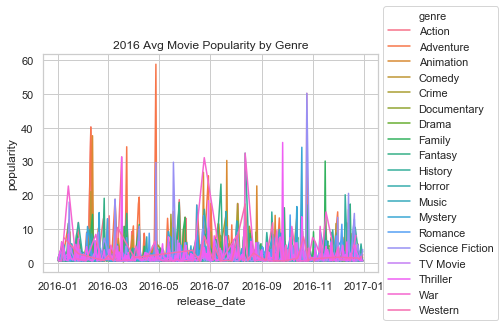

In [649]:
avg2016 = df3[['release_date', 'genre', 'popularity']][df3.release_date.dt.year == 2016].groupby(['release_date','genre']).mean()

avg2016.reset_index(inplace = True)


ax = sns.lineplot(x='release_date', 
                  y="popularity", 
                  hue="genre",
                  data=avg2016)
ax.set_title('2016 Avg Movie Popularity by Genre')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

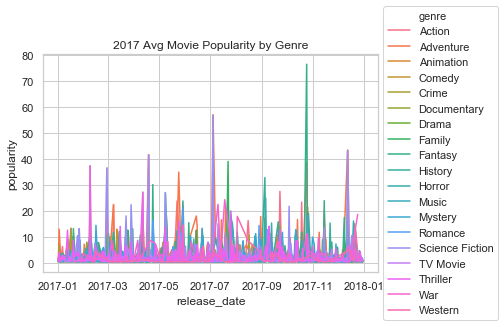

In [648]:
avg2017 = df3[['release_date', 'genre', 'popularity']][df3.release_date.dt.year == 2017].groupby(['release_date','genre']).mean()

avg2017.reset_index(inplace = True)

ax = sns.lineplot(x='release_date', 
                  y="popularity", 
                  hue="genre",
                  data=avg2017)
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.set_title('2017 Avg Movie Popularity by Genre')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

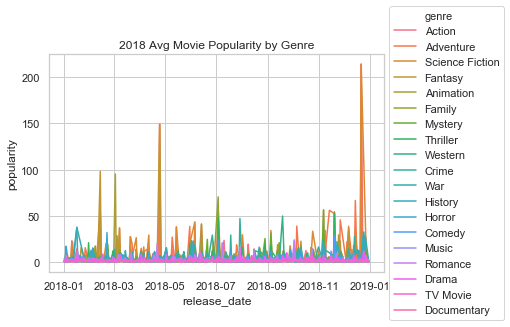

In [647]:
avg2018 = df3[['release_date', 'genre', 'popularity']][df3.release_date.dt.year == 2018].groupby(['release_date','genre']).mean().sort_values('popularity', ascending=False)

avg2018.reset_index(inplace = True)

ax = sns.lineplot(x='release_date', 
                  y="popularity", 
                  hue="genre",
                  data=avg2018)
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
#ax.fmt_xdata = mdates.DateFormatter('%Y-%m')
ax.set_title('2018 Avg Movie Popularity by Genre')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [632]:
df3[(df3.release_date.dt.year == 2018) & (df3.release_date.dt.month == 12)].sort_values('popularity', ascending=False).head()
# extremely popular japanese scifi/adventure movie in Dec 2018 ?

,genre,release_date,title,popularity
9776,Action,2018-12-22,Kamen Rider Heisei Generations FOREVER,213.591
9777,Adventure,2018-12-22,Kamen Rider Heisei Generations FOREVER,213.591
9778,Science Fiction,2018-12-22,Kamen Rider Heisei Generations FOREVER,213.591
59,Adventure,2018-12-07,Spider-Man: Into the Spider-Verse,77.173
58,Action,2018-12-07,Spider-Man: Into the Spider-Verse,77.173


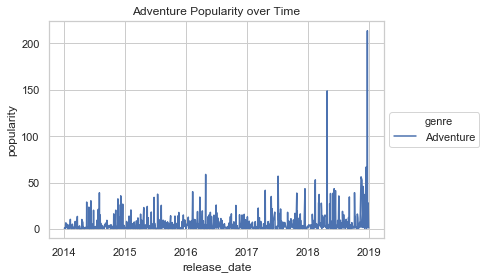

In [645]:
adventure = df3[['release_date', 'genre', 'popularity']][(df3.genre == 'Adventure') & (df3.release_date.dt.year > 2013) & (df3.release_date.dt.year < 2019)].groupby(['release_date','genre']).mean().sort_values('popularity', ascending=False)

adventure.reset_index(inplace = True)

ax = sns.lineplot(x='release_date', 
                  y="popularity", 
                  hue="genre",
                  data=adventure)
ax.set_title('Adventure Popularity over Time')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

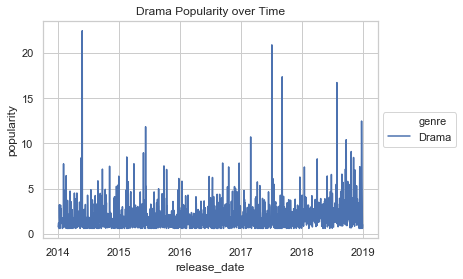

In [646]:
drama = df3[['release_date', 'genre', 'popularity']][(df3.genre == 'Drama') & (df3.release_date.dt.year > 2013) & (df3.release_date.dt.year < 2019)].groupby(['release_date','genre']).mean().sort_values('popularity', ascending=False)

drama.reset_index(inplace = True)

ax = sns.lineplot(x='release_date', 
                  y="popularity", 
                  hue="genre",
                  data=drama)
ax.set_title('Drama Popularity over Time')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Looking at the last 3 full years and using the same popularity metric determined in part 1, there is a little bit of seasonality evident in genre popularity. Some of it generally follows conventional ideas that summer is for big action blockbusters, which is most evident when we look at Adventure popularity alone for the past 5 years. However, I'd also expect a peak around November/December for award show season, typically heavy on drama-- this pattern is slightly detectable but not by much.

If I were to further evaluate this, I'd look beyond this period to get a better idea of the trends, and consider some outlier removal (i.e. the example of Kamen Rider Heisei Generations FOREVER above) . I was initially assuming that there would be bigger groupings of popular movies in the summer and end of year, so I'd like to dig deeper and re-evaluate my hypothesis. Maybe it would make sense after all for these spikes to exist during other times of year when there is less competition to attract movie goers, which certainly is not disproved by the data so far.